# Homework 9 - Dimensional Reduction tutorial
## Introduction
### What is Dimensionality?

"Dimensionality in statistics refers to how many attributes a dataset has. For example, healthcare data is notorious for having vast amounts of variables (e.g. blood pressure, weight, cholesterol level). In an ideal world, this data could be represented in a spreadsheet, with one column representing each dimension. In practice, this is difficult to do, in part because many variables are inter-related."


### High Dimensional Data

"High Dimensional means that the number of dimensions are staggeringly high — so high that calculations become extremely difficult. With high dimensional data, the number of features can exceed the number of observations. For example, microarrays, which measure gene expression, can contain tens of hundreds of samples. Each sample can contain tens of thousands of genes."

### What is Reduction of Dimensionality?

Reduction of dimensionality means to simplify understanding of data, either numerically or visually, while maintaining the data integrety.To reduce dimensionality, you could combine related data into groups using a tool like multidimensional scaling to identify similarities in data. You could also use clustering to group items together.


Data source - "https://www.statisticshowto.datasciencecentral.com/dimensionality/"

In this tutorial we will see how by combining a technique called Principal Component Analysis (PCA) together with Cluster Analysis we can represent in a two-dimensional space data defined in a higher dimensional one while, at the same time, be able to group this data in similar groups or clusters and find hidden relationships in our data.

##  Initial Data setup 

In this tutorial, we will use a dataset from kaggle, which has data of the world population from 1960 to 2015.
https://www.kaggle.com/mrpantherson/metal-by-nation#world_population_1960_2015.csv

In [1]:
import pandas as pd
import numpy as np
mydata = pd.read_csv(".\data\world_population_1960_2015.csv",index_col = 0, 
    thousands  = ',')
mydata.index.names = ['country']
mydata.columns.names = ['year']
mydata.head()


year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,58724.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,23061.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,10849510.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,6177703.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0


Check if the dataframe has any missing or Nan values

In [2]:
#np.isnan(mydata)
mydata.isnull().values.any()

True

The dataframe has missing data/ Nan values, fill the missing data with the fillna() using the method you like, we will using mean(). 

In [3]:
mmdata = mydata.fillna(mydata.mean()) #my modified data = mmdata
mmdata

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Aruba,5.420800e+04,5.543500e+04,5.622600e+04,5.669700e+04,5.702900e+04,5.736000e+04,5.771200e+04,5.804900e+04,5.838500e+04,5.872400e+04,...,1.008300e+05,1.012180e+05,1.013420e+05,1.014160e+05,1.015970e+05,1.019360e+05,1.023930e+05,1.029210e+05,1.034410e+05,1.038890e+05
Andorra,1.341400e+04,1.437600e+04,1.537600e+04,1.641000e+04,1.747000e+04,1.855100e+04,1.964600e+04,2.075500e+04,2.188800e+04,2.306100e+04,...,8.337300e+04,8.487800e+04,8.561600e+04,8.547400e+04,8.441900e+04,8.232600e+04,7.931600e+04,7.590200e+04,7.278600e+04,7.047300e+04
Afghanistan,8.994793e+06,9.164945e+06,9.343772e+06,9.531555e+06,9.728645e+06,9.935358e+06,1.014884e+07,1.036860e+07,1.059979e+07,1.084951e+07,...,2.518362e+07,2.587754e+07,2.652874e+07,2.720729e+07,2.796221e+07,2.880917e+07,2.972680e+07,3.068250e+07,3.162751e+07,3.252656e+07
Angola,5.270844e+06,5.367287e+06,5.465905e+06,5.565808e+06,5.665701e+06,5.765025e+06,5.863568e+06,5.962831e+06,6.066094e+06,6.177703e+06,...,1.854147e+07,1.918391e+07,1.984225e+07,2.052010e+07,2.121995e+07,2.194230e+07,2.268563e+07,2.344820e+07,2.422752e+07,2.502197e+07
Albania,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,1.965598e+06,2.022272e+06,2.081695e+06,...,2.992547e+06,2.970017e+06,2.947314e+06,2.927519e+06,2.913021e+06,2.904780e+06,2.900247e+06,2.896652e+06,2.893654e+06,2.889167e+06
Arab World,9.254053e+07,9.507799e+07,9.771119e+07,1.004394e+08,1.032637e+08,1.061841e+08,1.092107e+08,1.123426e+08,1.155571e+08,1.188239e+08,...,3.209067e+08,3.287666e+08,3.368865e+08,3.450542e+08,3.531122e+08,3.610318e+08,3.688026e+08,3.765043e+08,3.842226e+08,3.920223e+08
United Arab Emirates,9.261200e+04,1.009850e+05,1.122400e+05,1.252160e+05,1.382200e+05,1.503180e+05,1.610770e+05,1.717810e+05,1.853120e+05,2.055700e+05,...,5.171255e+06,6.010100e+06,6.900142e+06,7.705423e+06,8.329453e+06,8.734722e+06,8.952542e+06,9.039978e+06,9.086139e+06,9.156963e+06
Argentina,2.061908e+07,2.095308e+07,2.128768e+07,2.162184e+07,2.195393e+07,2.228339e+07,2.260875e+07,2.293220e+07,2.326127e+07,2.360599e+07,...,3.955875e+07,3.996990e+07,4.038186e+07,4.079864e+07,4.122288e+07,4.165562e+07,4.209522e+07,4.253830e+07,4.298003e+07,4.341676e+07
Armenia,1.867396e+06,1.934239e+06,2.002170e+06,2.070427e+06,2.138133e+06,2.204650e+06,2.269475e+06,2.332624e+06,2.394635e+06,2.456370e+06,...,3.002161e+06,2.988117e+06,2.975029e+06,2.966108e+06,2.963496e+06,2.967984e+06,2.978339e+06,2.992192e+06,3.006154e+06,3.017712e+06


## Dimensionality Reduction with PCA
In this section, we want to be able to represent each country in a two dimensional space.
By using PCA we will be able to reduce the 55 columns ( 1960 to 2015) to just the two of them that best captures that information.
In order to do so, we will first how to perform PCA and plot the first two PCs

Python's sklearn machine learning library comes with a PCA implementation.
This implementation uses the scipy.linalg implementation of the singular value decomposition.
When using this implementation of PCA we need to specify in advance the number
of principal components we want to use. 

In [5]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(mmdata) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We will use the transform method to get  a lower dimension representation of our data
frame, as a numPy array.

In [13]:
existing_2d = pca.transform(mmdata)

In [14]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = mmdata.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Aruba,-1.570125e+09,-5.159622e+06
Andorra,-1.570291e+09,-5.232725e+06
Afghanistan,-1.439899e+09,-2.283057e+07
Angola,-1.473909e+09,-2.432033e+07
Albania,-1.550430e+09,-2.332369e+06


In [15]:
pca.explained_variance_ratio_   #calculate the varience

array([0.99730554, 0.00247596])

## Display in graph and plots 

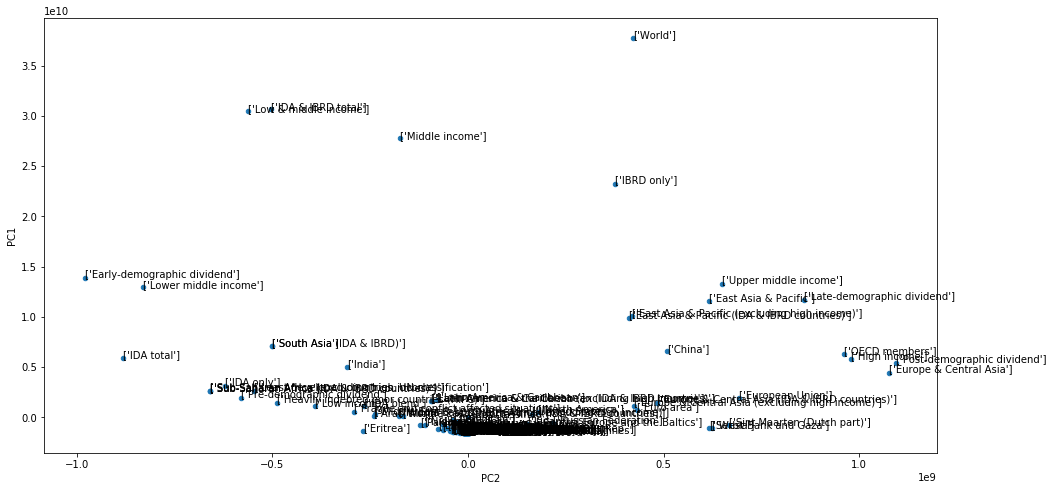

In [16]:
#plot the lower dimensionality version of our dataset. 

%matplotlib inline
    
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(mmdata.index):
    ax.annotate([country], 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )


Let's now create a bubble chart, by setting the point size to a value proportional to the mean value for all the years in that particular country. 

In [17]:
from sklearn.preprocessing import normalize
    
existing_df_2d['country_mean'] = pd.Series(mmdata.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
        country_mean_scaled, 
        index=existing_df_2d.index) 
existing_df_2d.head()


,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Aruba,-1.570125e+09,-5.159622e+06,7.414755e+04,0.000013
Andorra,-1.570291e+09,-5.232725e+06,4.955711e+04,0.000008
Afghanistan,-1.439899e+09,-2.283057e+07,1.643008e+07,0.003221
Angola,-1.473909e+09,-2.432033e+07,1.190943e+07,0.002334
Albania,-1.550430e+09,-2.332369e+06,2.697173e+06,0.000527


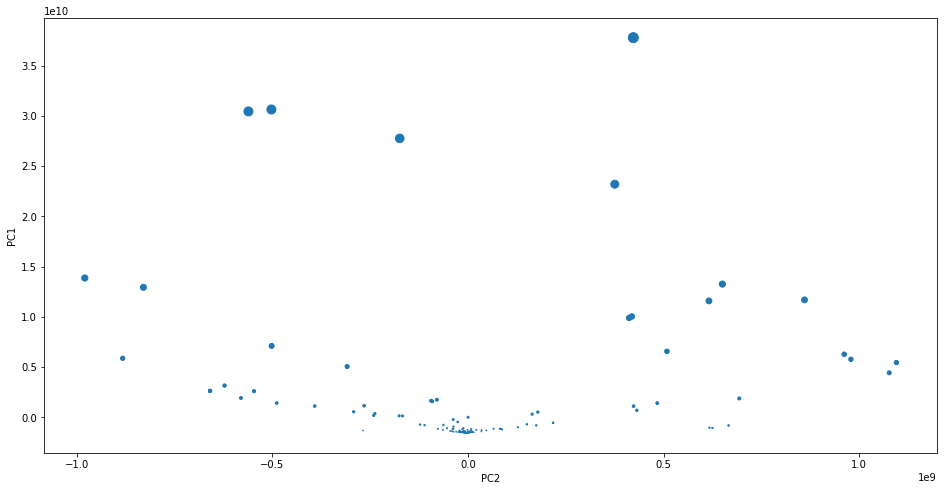

In [18]:
# plot using this variable size
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['country_mean_scaled']*100, 
    figsize=(16,8))

 let's associate the size with the change between 1995 and 2005. Note that in the scaled version, those values close to zero will make reference to those with negative values in the original non-scaled version, since we are scaling to a [0,1] range.

In [19]:
existing_df_2d['country_change'] = pd.Series(
    mmdata['2005']-mmdata['1995'], 
    index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled =  (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
        country_change_scaled, 
        index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Aruba,19705.0,0.281553
Andorra,17369.0,0.281550
Afghanistan,7627426.0,0.290967
Angola,4870276.0,0.287555
Albania,-176297.0,0.281310


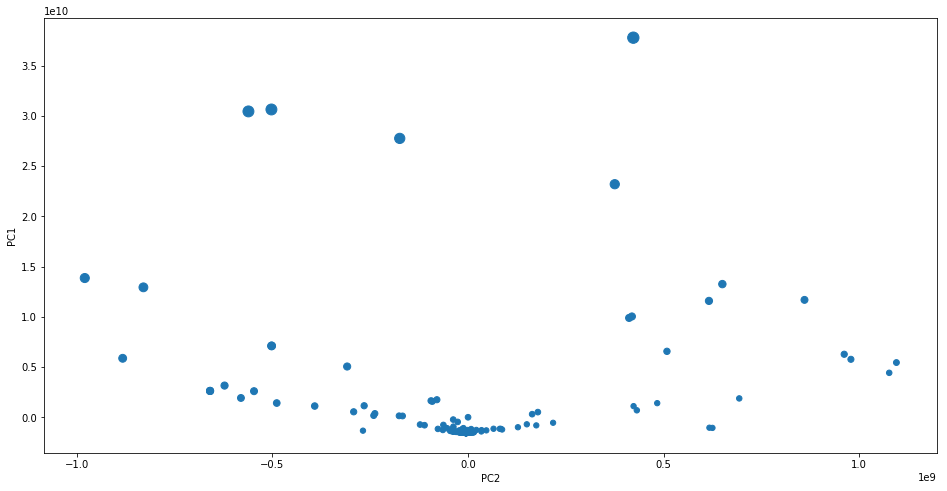

In [20]:
#plot the above

existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_change_scaled']*100, 
    figsize=(16,8))

## PCA Results

At the very bottom of our charts we saw an important concentration of countries. While we descend that axis, the number of countries is more sparse.  We saw that the first PC already explains almost 99% of the variance, while the second one accounts for another ~1% for a total.

## Exploring Data Structure with k-means Clustering
we will use sklearn, in this case its k-means clustering implementation, in order to perform our clustering.

In [33]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=4) #taking number of clusters as 4
clusters = kmeans.fit(mmdata)

Now we need to store the cluster assignments together with each country in our
data frame. The cluster labels are returned in clusters.labels_.

In [34]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

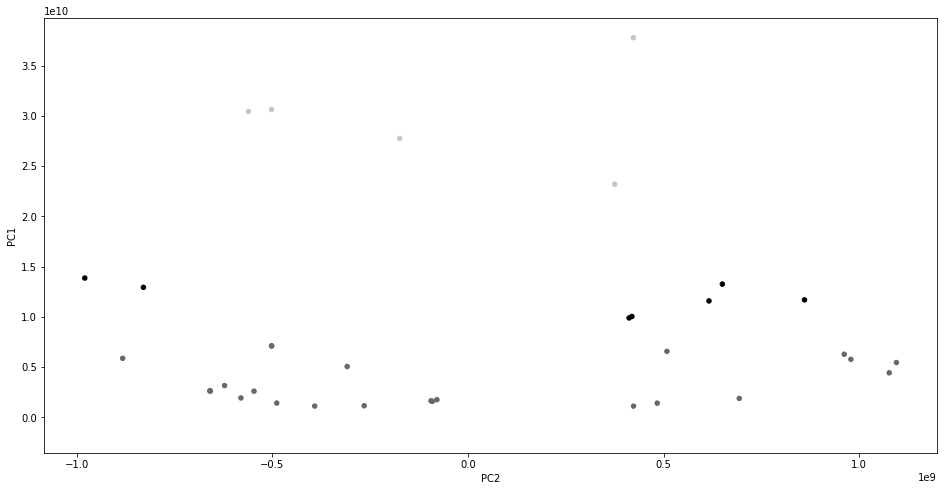

In [35]:
#plot the cluster

import numpy as np
    
existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(16,8))

# Extra Credit
## Cluster Analysis/interpretation

Below, we will analyse the items ( counties ) in each cluster. For which we will create a new dataframe, which has the existing dataframe along with a column which contains the value of each cluster.

In [36]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = existing_df_2d.index.values
cluster_map['cluster'] = clusters.labels_

### Cluster 0

In [37]:
cluster_map[cluster_map.cluster == 0]

,data_index,cluster
0,Aruba,0
1,Andorra,0
2,Afghanistan,0
3,Angola,0
4,Albania,0
5,Arab World,0
6,United Arab Emirates,0
7,Argentina,0
8,Armenia,0
9,American Samoa,0


### Cluster 1

In [38]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
99,IBRD only,1
100,IDA & IBRD total,1
138,Low & middle income,1
154,Middle income,1
257,World,1


### Cluster 2

In [39]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
38,China,2
61,Europe & Central Asia (excluding high income),2
62,Europe & Central Asia,2
70,European Union,2
92,High income,2
95,Heavily indebted poor countries (HIPC),2
101,IDA total,2
102,IDA blend,2
104,IDA only,2
106,India,2


### Cluster 3

In [40]:
cluster_map[cluster_map.cluster == 3]

,data_index,cluster
58,East Asia & Pacific (excluding high income),3
59,Early-demographic dividend,3
60,East Asia & Pacific,3
137,Lower middle income,3
140,Late-demographic dividend,3
227,East Asia & Pacific (IDA & IBRD countries),3
246,Upper middle income,3


In [41]:
cluster_map.groupby("cluster")['cluster'].count() #count of counties in each cluster

cluster
0    228
1      5
2     24
3      7
Name: cluster, dtype: int64

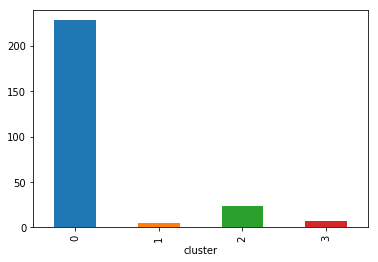

In [42]:
#plot the count of countries in each cluster
cluster_map.groupby("cluster")['cluster'].count().plot(kind='bar')

we see that cluster 0 has more number of countries when compared to the other 3 clusters. According to the plot seen in k-means, we can assume that this is the cluster which is dense at the bottom.

# Reference
- [1] https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka
- [2] https://stackoverflow.com/questions/36195457/python-sklearn-kmeans-how-to-get-the-values-in-the-cluster